# Generate 100 points in two dimensions randomly. Assign point in class 1 if `x > y` otherwise assign it in class 2. Implement all the classifiers given in no. 6 above. Test the classifiers with any points.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [2]:
def generate_data():
    data = []
    for i in range(100):
        x = np.random.randint(-400, 400)
        y = np.random.randint(-400, 400)
        Class = 1 if x > y else 2
        data.append([x, y, Class])
    return pd.DataFrame(data, columns=["x", "y", "Class"])


In [3]:
df = generate_data()
df.head()


,x,y,Class
0,262,-155,1
1,312,-43,1
2,141,126,1
3,-358,346,2
4,110,24,1


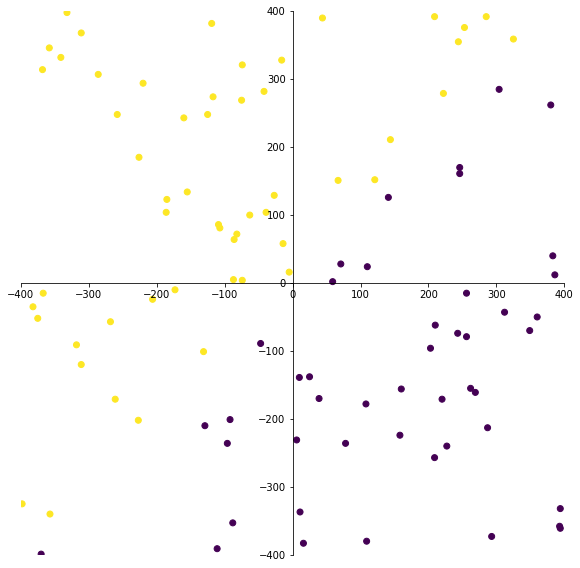

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set(xlim=(-400, 400), ylim=(-400, 400), aspect='equal')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(x="x", y="y", data=df, c="Class")


In [5]:
y = df["Class"]
x = df.drop(columns="Class")


In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)


## SVM


In [7]:
svm_model = SVC()
svm_model.fit(x_train, y_train)


SVC()

In [8]:
svm_model.score(x_test, y_test)


0.96

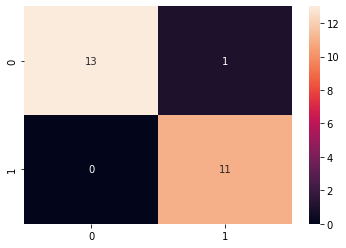

In [9]:
y_prediction_svm = svm_model.predict(x_test)
cm_svm = confusion_matrix(y_test, y_prediction_svm)
sn.heatmap(cm_svm, annot=True)


In [10]:
print(classification_report(y_test, y_prediction_svm))


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



## Naive Bayes


In [11]:
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)


GaussianNB()

In [12]:
naive_model.score(x_test, y_test)


0.96

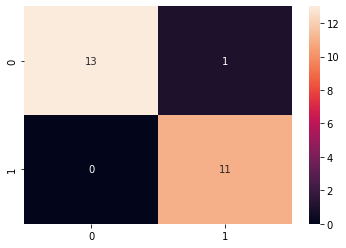

In [13]:
y_prediction_naive = naive_model.predict(x_test)
cm_naive = confusion_matrix(y_test, y_prediction_naive)
sn.heatmap(cm_naive, annot=True)


In [14]:
print(classification_report(y_test, y_prediction_naive))


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



## Decision Tree


In [15]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)


DecisionTreeClassifier()

In [16]:
model_tree.score(x_test, y_test)


0.96

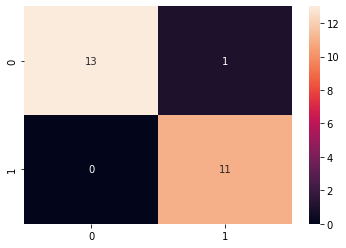

In [17]:
y_prediction_tree = model_tree.predict(x_test)
cm_tree = confusion_matrix(y_test, y_prediction_tree)
sn.heatmap(cm_tree, annot=True)


In [18]:
print(classification_report(y_test, y_prediction_tree))


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



## Random Forest


In [19]:
model_rf = RandomForestClassifier(n_estimators=10)
model_rf.fit(x_train, y_train)


RandomForestClassifier(n_estimators=10)

In [20]:
model_rf.score(x_test, y_test)


0.8

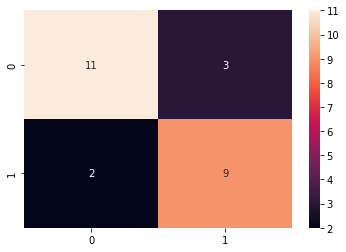

In [21]:
y_prediction_rf = model_rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_prediction_rf)
sn.heatmap(cm_rf, annot=True)


In [22]:
print(classification_report(y_test, y_prediction_rf))


              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.75      0.82      0.78        11

    accuracy                           0.80        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.80      0.80      0.80        25



## Neural Network


In [23]:
model_nn = MLPClassifier(hidden_layer_sizes=(
    10, 5, 5), max_iter=300, activation='relu', solver='adam', random_state=1)
model_nn.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 5, 5), max_iter=300, random_state=1)

In [24]:
model_nn.score(x_test, y_test)


0.96

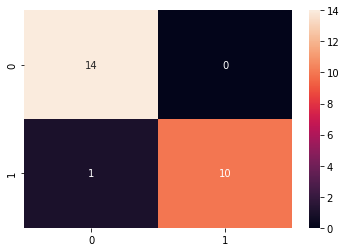

In [25]:
y_prediction_nn = model_nn.predict(x_test)
cm_nn = confusion_matrix(y_test, y_prediction_nn)
sn.heatmap(cm_nn, annot=True)


In [26]:
print(classification_report(y_test, y_prediction_nn))


              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

